In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural,m01_d2,conv2_2,NaN,0.021,0.129,6.556,6.556,0.114,NaN,NaN
1,vgg19_neural,m01_d2,conv2_2,10.0,0.018,0.110,6.556,6.556,0.184,-0.099,-0.118
2,vgg19_neural,m01_d2,conv2_2,20.0,0.019,0.111,6.556,6.556,0.180,-0.094,-0.118
3,vgg19_neural,m01_d2,conv2_2,50.0,0.021,0.129,6.556,6.556,0.177,-0.087,-0.119
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,6.556,6.556,0.177,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m02_d3,fc,200.0,0.021,0.168,1.615,1.615,0.157,0.107,NaN
96,simclr_neural,m02_d3,fc,300.0,0.021,0.169,1.615,1.615,0.157,0.105,NaN
97,simclr_neural,m02_d3,fc,400.0,0.021,0.169,1.615,1.615,0.158,0.110,NaN
98,simclr_neural,m02_d3,fc,500.0,0.021,0.169,1.615,1.615,0.158,0.084,NaN


In [2]:
# Alpha is the same for a given layer and mouse regardless of n_pcs - just filter on 100 here to get one alpha value per layer per mouse
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,6.556,6.556,0.177,-0.091,-0.120
9,vgg19_neural,m01_d2,conv3_4,100.0,0.018,0.109,3.816,3.816,0.199,-0.056,-0.136
14,vgg19_neural,m01_d2,conv4_4,100.0,0.019,0.128,3.042,3.042,0.160,0.000,-0.106
19,vgg19_neural,m01_d2,conv5_4,100.0,0.012,0.099,3.890,3.890,0.122,0.252,-0.118
24,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.651,1.651,0.214,0.108,-0.065
33,vgg19_neural,m01_d2,fc2,100.0,0.010,0.095,1.860,1.860,0.093,0.447,-0.112
38,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,0.517,0.517,0.225,-0.114,-0.097
47,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,0.738,0.738,0.233,-0.080,-0.076
56,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,0.953,0.953,0.245,-0.005,-0.081
65,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.123,1.123,0.193,0.085,-0.071


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,simclr_neural,fc,100.0,0.019000,0.121000,1.628667,1.628667,0.174333,0.108,-0.057667
1,simclr_neural,layer1,100.0,0.020333,0.109333,0.515667,0.515667,0.195000,-0.114,-0.105333
2,simclr_neural,layer2,100.0,0.039000,0.178333,0.740667,0.740667,0.209333,-0.080,-0.086000
3,simclr_neural,layer3,100.0,0.041000,0.168333,0.956667,0.956667,0.213333,-0.005,-0.080333
4,simclr_neural,layer4,100.0,0.026000,0.128000,1.127667,1.127667,0.165333,0.085,-0.073333
5,vgg19_neural,conv2_2,100.0,0.016667,0.109333,6.023000,6.023000,0.137000,-0.091,-0.124667
6,vgg19_neural,conv3_4,100.0,0.015000,0.099000,3.798000,3.798000,0.146333,-0.056,-0.130000
7,vgg19_neural,conv4_4,100.0,0.015000,0.121000,3.005000,3.005000,0.118333,0.000,-0.112000
8,vgg19_neural,conv5_4,100.0,0.009667,0.093333,3.769000,3.769000,0.091667,0.252,-0.118667
9,vgg19_neural,fc2,100.0,0.008000,0.091333,1.834333,1.834333,0.070667,0.447,-0.107333


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")
avg_metrics

# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['alpha'].sem().reset_index()
sem_df.columns = ['layer', 'sem_alpha']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')

In [7]:
# Load neural alpha for each mouse
paths = [
    Path("../../../analysis/mouse_m01_d2/03_simclr_neural/neural_dimensionality.json"),
    Path("../../../analysis/mouse_m02_d3/03_simclr_neural/neural_dimensionality.json"),
    Path("../../../analysis/mouse_m03_d4/03_simclr_neural/neural_dimensionality.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.append(data)

neural_alpha_df = pd.DataFrame(all_data)
neural_alpha_df = neural_alpha_df.sort_values(["mouse_id"], na_position='first').reset_index(drop=True)
neural_alpha_df = pd.DataFrame(all_data).rename(columns={"alpha_all_neurons": "alpha"})

print(f"Loaded {len(neural_alpha_df)} rows from {len(paths)} files.")
neural_alpha_df.head(100)

Loaded 3 rows from 3 files.


,mouse_id,alpha,r2_all_neurons,n_all_neurons,alpha_filtered_neurons,r2_filtered_neurons,n_filtered_neurons
0,m01_d2,0.779203,0.694234,17842,1.305376,0.931391,500
1,m02_d3,0.832173,0.952643,20387,1.269379,0.613165,500
2,m03_d4,0.940392,0.925821,15363,1.174207,0.915728,500


In [8]:
# Compute neural_alpha mean and SEM
neural_alpha_mean = neural_alpha_df['alpha'].mean()
neural_alpha_sem = neural_alpha_df['alpha'].sem()

<Figure size 600x500 with 0 Axes>

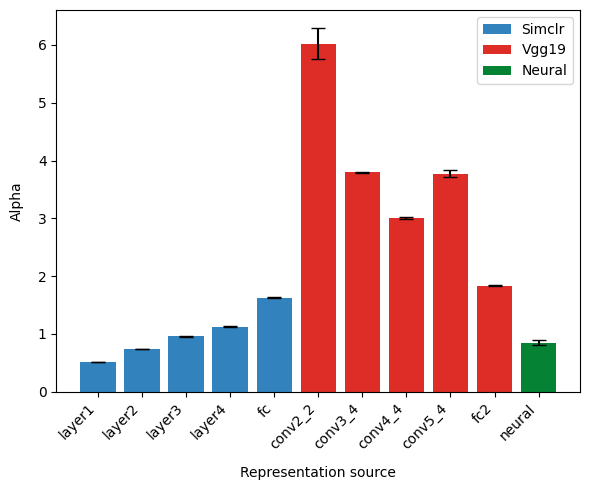

In [9]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours, neural_colour

# Clean labels and sort
ordered_labels = [
    'layer1', 'layer2', 'layer3', 'layer4', 'fc',
    'conv2_2', 'conv3_4', 'conv4_4', 'conv5_4', 'fc2'
]
avg_metrics["layer"] = pd.Categorical(
        avg_metrics["layer"], categories=ordered_labels, ordered=True)

avg_metrics = avg_metrics.sort_values('layer')

# Colour mapping by model
model_colour = {
    'simclr': simclr_colours['layer4'],
    'vgg19': vgg19_colours['conv5_4'],
}

avg_metrics["colour"] = avg_metrics["model_target"].str.lower().map(
    lambda s: next((v for k, v in model_colour.items() if k in s), None)
)

# Plot
plt.figure(figsize=(6, 5))

# Extend data for plotting
x_labels = list(avg_metrics['layer'].astype(str)) + ['neural']
heights = list(avg_metrics['alpha']) + [neural_alpha_mean]
colors = list(avg_metrics['colour']) + [neural_colour]
errors = list(avg_metrics['sem_alpha']) + [neural_alpha_sem] 

# Plot
plt.figure(figsize=(6, 5))
plt.bar(
    x=x_labels,
    height=heights,
    yerr=errors,
    capsize=5,
    color=colors
)

# plt.axhline(
#     y=neural_alpha_mean,             
#     linestyle='--',
#     color=neural_colour,
#     linewidth=1.5,
#     label='Subject-averaged neural α'
# )
# x_center = (len(x_labels) - 1) / 2  # middle of x-axis range
# plt.text(
#     x=x_center,
#     y=neural_alpha_mean + 0.05,  # slight offset above the line
#     s='Subject-averaged neural α',
#     color='green',
#     ha='center',
#     va='bottom'
# )

# Axis and legend
plt.ylabel('Alpha', labelpad=10)
plt.xlabel('Representation source', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.legend(
    handles=[
        Patch(facecolor=color, label=model.capitalize())
        for model, color in model_colour.items()
    ] + [Patch(facecolor=neural_colour, label='Neural')],
    # title="Model"
)
plt.tight_layout()
plt.savefig("./figures/alpha-bar.svg", format='svg')
plt.show()

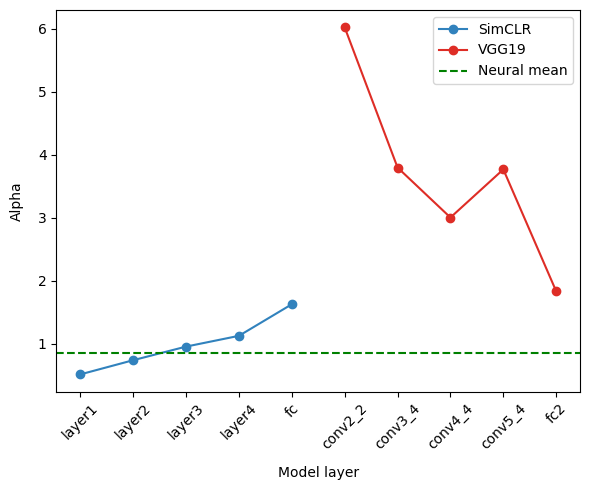

In [10]:
import matplotlib.pyplot as plt

# Filter avg_metrics for plotting
simclr_alpha = avg_metrics[avg_metrics['model'] == 'simclr']
vgg19_alpha = avg_metrics[avg_metrics['model'] == 'vgg19']

plt.figure(figsize=(6, 5))
plt.plot(simclr_alpha['layer'].astype(str), simclr_alpha['alpha'], marker='o', label='SimCLR', color=simclr_colours['layer4'])
plt.plot(vgg19_alpha['layer'].astype(str), vgg19_alpha['alpha'], marker='o', label='VGG19', color=vgg19_colours['conv5_4'])

# Optional: add neural mean as reference
plt.axhline(y=neural_alpha_mean, color='green', linestyle='--', label='Neural mean')

# Labels and layout
plt.ylabel('Alpha', labelpad=10)
plt.xlabel('Model layer', labelpad=10)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("./figures/alpha-line.svg", format='svg')
plt.show()